In [1]:
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime

In [2]:
# Current IO
IO = 374361

In [3]:
# The IOdata.csv file must have daily cumulative IO, with 1 day per column and each row being 1 minute
# Must be formatted as "general"
#data=pd.read_csv(r'C:\Users\i04603835\Desktop\Python Scripts\IOdata.csv')
url='https://raw.githubusercontent.com/sbarton6491/Endress/main/IOdata.csv'
data = pd.read_csv(url, index_col=0)
data = np.array(data)
data = np.asarray(data, dtype=np.float64,order='C')

# Formats the current time in number of minutes past 8am
tz = pytz.timezone('US/Eastern')
now = datetime.now(tz).time()
now = (now.hour-8)*60+now.minute

In [4]:
# Creates a "time" axis the same length as the # of data points (rows) and
# Creates a "day" axis the same length as the # of days (columns)
t = np.linspace(0,len(data[:,1]),len(data[:,1]))
d = np.linspace(0,len(data[1,:]),len(data[1,:]))

In [5]:
# Assigns the # of days to a variable
j = len(data[1,:])-1

# Loops over each day (column) to normalize everything to percent of the final value
while j>=0:
    data[:,j] = data[:,j]/data[-1,j]
    j=j-1

In [6]:
# Calculates the prediction based on the current time
prediction = IO/data[now,:]
prediction = np.sort(prediction)

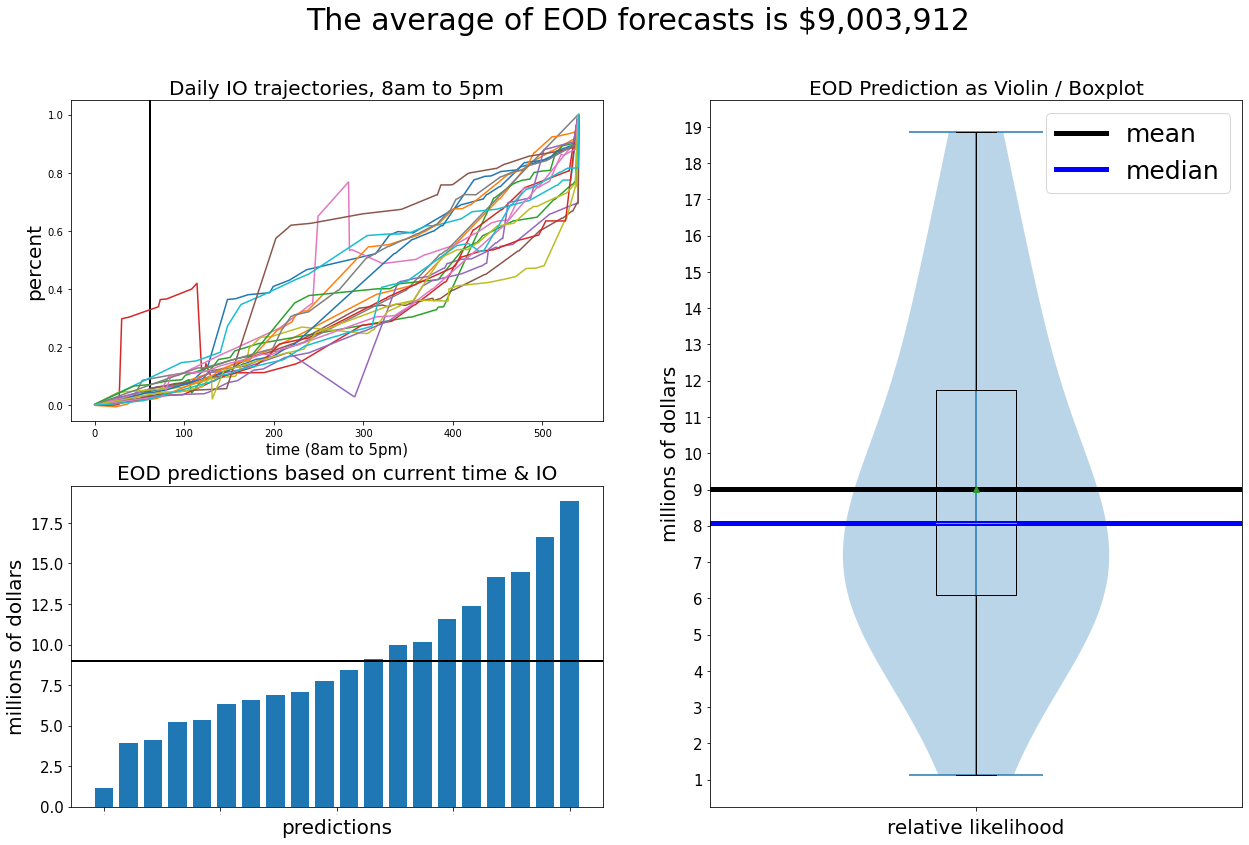

In [7]:
# # Creates a plot
fig = plt.figure(figsize=(21,13))
fig.suptitle('The average of EOD forecasts is ${:,.0f}'.format(np.mean(prediction)), fontsize=30)

ax1 = plt.subplot2grid((2,2),(0,0))
plt.title('Daily IO trajectories, 8am to 5pm', fontsize=20)
plt.xlabel('time (8am to 5pm)', fontsize=15)
#ax1.set_yticks(fontsize=0)
plt.ylabel('percent', fontsize=20)
#ax1.set_xticks(fontsize=0)
ax1.axvline(x=now, linewidth=2, color='black')
j = len(data[1,:])-1
while j>=0:
    ax1.plot(t,data[:,j])
    j=j-1
    
ax2 = plt.subplot2grid((2,2),(1,0))
plt.title('EOD predictions based on current time & IO', fontsize=20)
plt.axhline(y=np.mean(prediction)/1000000, linewidth=2, color='black')
plt.bar(d,prediction/1000000)
plt.xticks(fontsize=0)
plt.xlabel('predictions', fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('millions of dollars',fontsize=20)

ax3 = plt.subplot2grid((2,2),(0,1), rowspan=2)
plt.title('EOD Prediction as Violin / Boxplot', fontsize=20)
plt.violinplot(prediction/1000000, showmeans=True, vert=True)
plt.boxplot(prediction/1000000, vert=True, showfliers=False, showmeans=True)
plt.axhline(y=np.mean(prediction)/1000000, linewidth=5, color='black', label='mean')
plt.axhline(y=np.median(prediction)/1000000, linewidth=5, color='blue', label='median')
ax3.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks(fontsize=0)
plt.xlabel('relative likelihood',fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('millions of dollars',fontsize=20)
plt.legend(fontsize=25);